In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as rnd
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.pipeline import Pipeline,make_pipeline

In [4]:
from sklearn.metrics import v_measure_score
from sklearn.metrics import silhouette_score

In [5]:
from sklearn.datasets import make_blobs

## K-means
W jakich przypadkach algorytm działą dobrze ("założenia"):
- dane "wyspowe"
- jednorodne klastry
- równe liczności klastrów

Algorytm K-średnich dąży do minimalizacji zmienności wewnątrzgrupowej (*inertia*):

*inertia* = $\sum\limits_{i=1}^K \sum\limits_{x \in C_i} ||x-\mu_i||^2 = \sum\limits_{i=1}^K n_i\cdot Var(C_i)$


Algorytm iteruje dopóki zmiana tej wielkości między kolejnymi krokami nie będzie mniejsza niż zadany próg.

$\frac{Inertia(n)-Inertia(n+1)}{Inertia(n)} < t$

Nie musi to oznaczać, że nic się już nie zmieniło, tak jak jest to w prostych przykładach

Uwaga: powyżej mamy inercję całkowitą - dla całych danych.

In [6]:
colors = np.array(sns.color_palette('Set2',20))

In [7]:
points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((5,2),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((2,7),np.array([[1,0],[0,1]]),20)],axis=0)

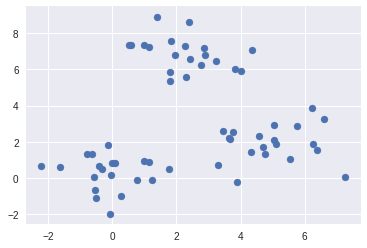

In [11]:
plt.scatter(points[:,0],points[:,1]);

In [12]:
model = KMeans(n_clusters=3,n_jobs=4)
model.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
labels = model.predict(points)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [14]:
model.cluster_centers_

array([[-0.08178349,  0.2972164 ],
       [ 2.26880643,  6.87417661],
       [ 4.96143261,  1.9022766 ]])

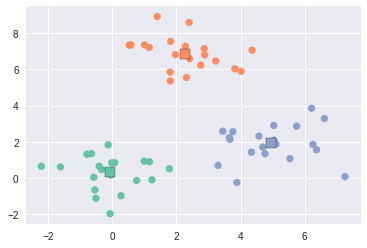

In [15]:
plt.scatter(points[:,0],points[:,1],c=colors[labels])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='s',c=colors,s=100,edgecolors='black')
plt.show()

In [16]:
model = KMeans(n_clusters=3,n_jobs=1,verbose=1)
model.fit(points)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 117.490670902
start iteration
done sorting
end inner loop
Iteration 1, inertia 117.490670902
center shift 0.000000e+00 within tolerance 7.021420e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 117.490670902
start iteration
done sorting
end inner loop
Iteration 1, inertia 117.490670902
center shift 0.000000e+00 within tolerance 7.021420e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 117.490670902
start iteration
done sorting
end inner loop
Iteration 1, inertia 117.490670902
center shift 0.000000e+00 within tolerance 7.021420e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 117.490670902
start iteration
done sorting
end inner loop
Iteration 1, inertia 117.490670902
center shift 0.000000e+00 within tolerance 7.021420e-04
Initialization complete
start iteration
done sor

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [17]:
points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((5,2),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((2,20),np.array([[4,0],[0,4]]),30)],axis=0)

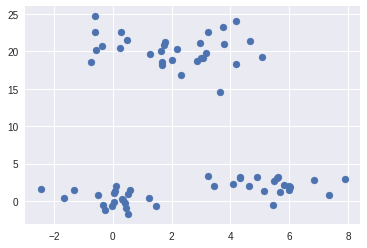

In [18]:
plt.scatter(points[:,0],points[:,1]);

In [19]:
model = KMeans(n_clusters=3,n_jobs=-1)
labels = model.fit_predict(points)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

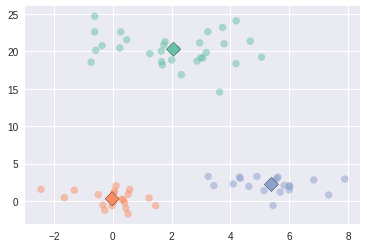

In [20]:
plt.scatter(points[:,0],points[:,1],c=colors[labels],alpha=0.5)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='D',s=100,c=colors,edgecolors='black');

## Variables transformation

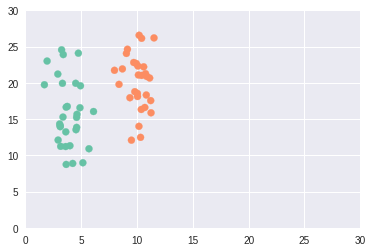

In [21]:
rnd.seed(1)
n = 30
points = np.concatenate([rnd.multivariate_normal((4,15),np.array([[1,0],[0,30]]),n),
                    rnd.multivariate_normal((10,20),np.array([[1,0],[0,30]]),n)],axis=0)
labels = np.repeat([0,1],n)

plt.scatter(points[:,0],points[:,1],c = colors[labels])
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

In [22]:
model = KMeans(n_clusters=2)
labels = model.fit_predict(points)

Gdy różnica na osi y jest znacząco większa niż rożnica na osi x (y >>x)- patrząc na odegłość euklidesową w takiej sytuacji zachodzi:

$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2} \approx \sqrt{(y_1-y_2)^2})$

Czyli grupowanie opiera się na zmiennej (zmiennych) dominującej.

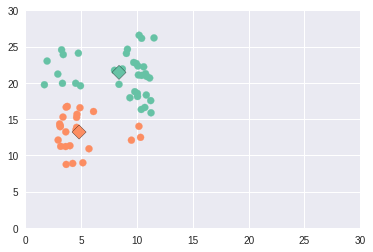

In [23]:
plt.scatter(points[:,0],points[:,1],c = colors[labels])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c = colors[labels],
            marker='D',s=100,edgecolors = 'black')
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

## Standarization

In [24]:
scaler = StandardScaler()

In [25]:
points_scaled = scaler.fit_transform(points)

In [26]:
labels_scaled = model.fit_predict(points_scaled)

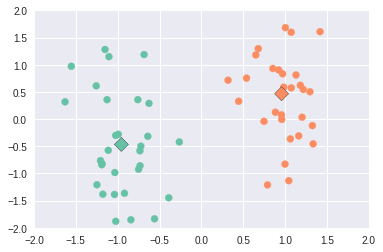

In [27]:
plt.scatter(points_scaled[:,0],points_scaled[:,1],c = colors[labels_scaled])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c = colors,
            marker='D',s=100,edgecolors='black')
plt.xlim(-2,2)
plt.ylim(-2,2)

plt.show()

In [28]:
km = KMeans(n_clusters=2)
pipe = make_pipeline(scaler,km)

In [29]:
pipe.steps

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('kmeans',
  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
      random_state=None, tol=0.0001, verbose=0))]

In [30]:
pipe.__dict__

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('kmeans',
   KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0))]}

In [31]:
pipe.fit(points)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [32]:
pipe.named_steps['kmeans'].cluster_centers_

array([[-0.95708052, -0.46662977],
       [ 0.95708052,  0.46662977]])

In [33]:
labels_scaled2 = pipe.fit_predict(points)

### Normalization
Przykłady zastosowań normalizacji?
    - ogólnie sytuacje, gdy nie interesują nas wartości bezwzględne, ale proporcje (np. gdy grupujemy dokumenty chcąc uzyskać w klastrach dokumenty o podobnej zawartości, a dokumenty są różnej długości)

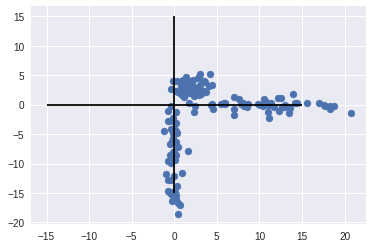

In [34]:
rnd.seed(123)
points = np.concatenate([rnd.multivariate_normal((2,3),np.array([[1,0],[0,1]]),50),
                        rnd.multivariate_normal((10,0),np.array([[30,0],[0,0.5]]),50),
                        rnd.multivariate_normal((0,-8),np.array([[0.3,0],[0,30]]),50)], axis = 0)

plt.scatter(points[:,0],points[:,1])

plt.hlines(0,-15,15)

plt.vlines(0,-15,15)
plt.show()

In [35]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(points)

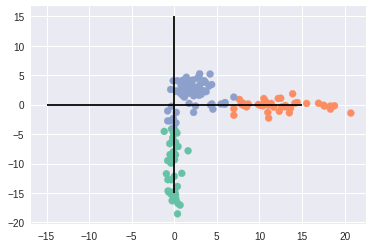

In [36]:
plt.scatter(points[:,0],points[:,1],c = colors[labels])
plt.hlines(0,-15,15)
plt.vlines(0,-15,15)
plt.show()

In [37]:
norm = Normalizer('l2')#l2 norm
points_norm = norm.fit_transform(points)

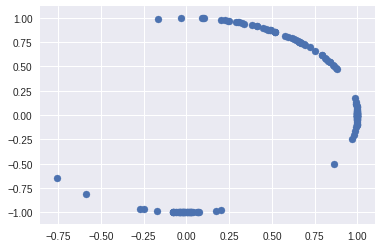

In [38]:
plt.scatter(points_norm[:,0],points_norm[:,1])
plt.show()

In [39]:
norm1 = Normalizer('l1')#l1 norm
points_norm1 = norm1.fit_transform(points)

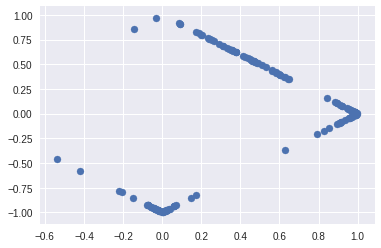

In [40]:
plt.scatter(points_norm1[:,0],points_norm1[:,1])
plt.show()

In [41]:
kn = KMeans(n_clusters=3)
points_norm_knn = kn.fit_predict(points_norm)

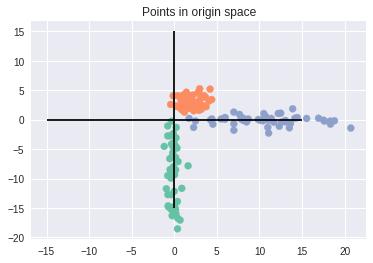

In [42]:
plt.scatter(points[:,0],points[:,1],c = colors[points_norm_knn])
plt.hlines(0,-15,15)
plt.vlines(0,-15,15)
plt.title('Points in origin space')
plt.show()

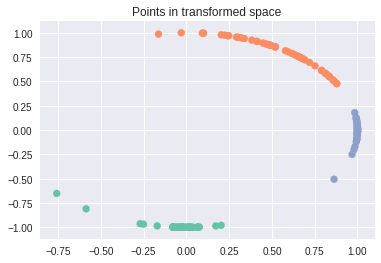

In [43]:
plt.scatter(points_norm[:,0],points_norm[:,1],c = colors[points_norm_knn])
plt.title('Points in transformed space')
plt.show()

### Fish

### V-score
The V-Measure is defined as the harmonic mean of homogeneity $h$ and completeness $c$ of the clustering.
$$ V = 2 \cdot \frac{h \cdot c}{h + c} $$
Homogeneity $h$ is maximized when each cluster contains elements of as few different classes as possible. 

Completeness $c$ aims to put all elements of each class in single clusters. 

Both these measures can be expressed in terms of the mutual information and entropy measures originating from the field of information retrieval.

In [44]:
data = pd.read_csv("Data/fish.csv", sep=";",decimal=",")

In [45]:
data.head()

,Weight,Length1,Length2,Length3,Height,Width,Species
0,242.0,23.2,25.4,30.0,38.4,13.4,1
1,290.0,24.0,26.3,31.2,40.0,13.8,1
2,340.0,23.9,26.5,31.1,39.8,15.1,1
3,363.0,26.3,29.0,33.5,38.0,13.3,1
4,430.0,26.5,29.0,34.0,36.6,15.1,1


In [46]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width,Species
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,398.695570,26.226582,28.393038,31.188608,28.256329,14.119620,4.518987
std,359.086204,10.024844,10.746572,11.637010,8.296377,2.281229,2.385523
min,0.000000,7.500000,8.400000,8.800000,14.500000,8.700000,1.000000
25%,120.000000,19.025000,21.000000,23.125000,24.225000,13.400000,2.250000
50%,272.500000,25.100000,27.150000,29.350000,27.000000,14.600000,5.000000
75%,650.000000,32.700000,35.750000,39.675000,37.700000,15.300000,7.000000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,20.900000,7.000000


In [47]:
data.Species.unique()

array([1, 2, 3, 4, 5, 6, 7])

In [48]:
data = data[data.Weight != 0]

In [49]:
X = data.iloc[:,:-1]

In [50]:
model = KMeans(n_clusters=7,n_jobs=-1)
labels = model.fit_predict(X)

In [51]:
len(labels)

157

In [52]:
pd.crosstab(data["Species"],labels)

col_0,0,1,2,3,4,5,6
Species,,,,,,,
1,0,6,13,5,0,0,10
2,0,1,1,3,0,0,1
3,4,0,0,3,0,12,0
4,3,0,0,2,0,6,0
5,14,0,0,0,0,0,0
6,0,2,6,4,3,1,1
7,9,8,2,8,0,20,9


In [53]:
v_measure_score(data.Species,model.predict(X))

0.31023773843098079

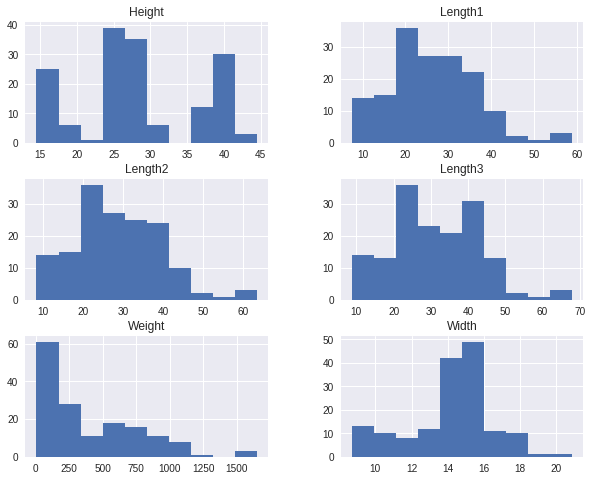

In [54]:
X.hist(figsize=(10,8));

In [55]:
pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('knn',KMeans(n_clusters=7,n_jobs=-1))
])
fish_labels = pipe.fit_predict(X)

In [56]:
pd.crosstab(data.Species,fish_labels)

col_0,0,1,2,3,4,5,6
Species,,,,,,,
1,0,0,31,0,0,0,3
2,0,3,0,3,0,0,0
3,0,19,0,0,0,0,0
4,0,0,0,0,0,0,11
5,0,0,0,0,0,14,0
6,12,0,0,0,5,0,0
7,0,37,0,19,0,0,0


In [57]:
v_measure_score(data.Species,fish_labels)

0.7687946285765842

### Clustering validation. Optimal number of clusters

In [58]:
rnd.seed(1)
points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((5,2),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((2,7),np.array([[1,0],[0,1]]),20)],axis=0)

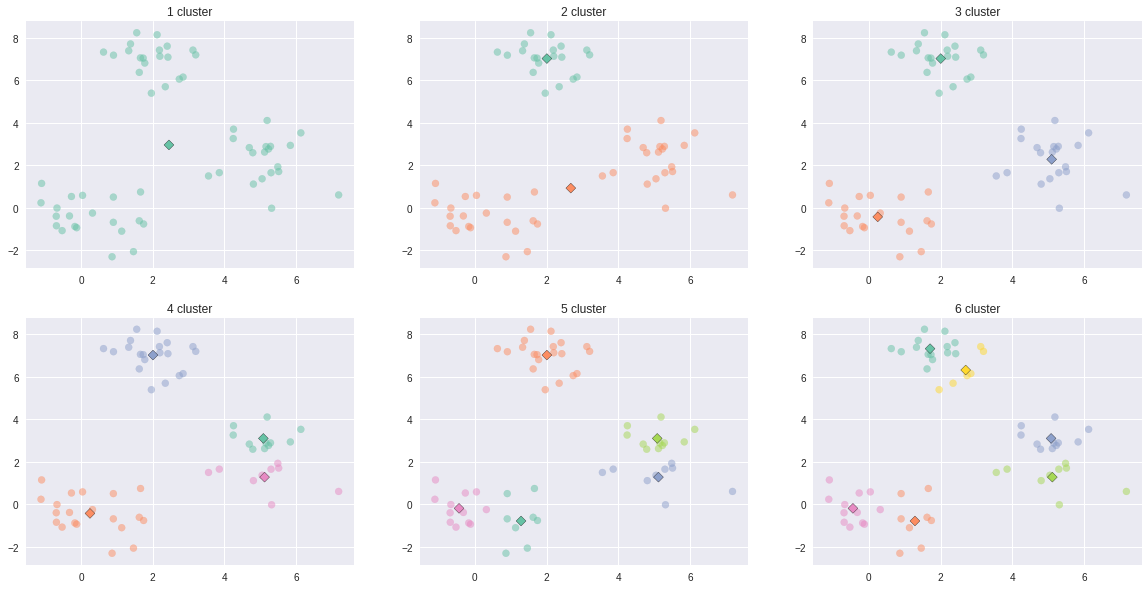

In [59]:
inertias = []
plt.figure(figsize=(20,10))
for it in range(1,7):
    model = KMeans(n_clusters=it)
    labels = model.fit_predict(points)
    inertias.append(model.inertia_)
    plt.subplot(2,3,it)
    plt.scatter(points[:,0],points[:,1],c=colors[labels],alpha=0.5)
    plt.title('{} cluster'.format(it))
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c=colors,marker='D',edgecolor='black')

### Elbow method with inertia distribution

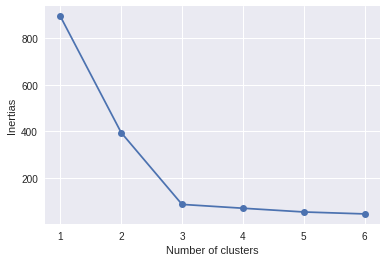

In [60]:
plt.plot(range(1,7),inertias,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias');

### Silhouette score 
The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
# $s(i) = \frac{b(i)  - a(i)}{max\{a(i),b(i)\}}$

$a(i)$ - average distance between i-th point and all points from the same cluster

$b(i)$ - average distance between i-th point and all points from the neighbouring (closest) cluster


In [61]:
sil_score = []
for it in range(2,7):
    model = KMeans(n_clusters=it)
    labels = model.fit_predict(points)
    sil_score.append(silhouette_score(points,labels))

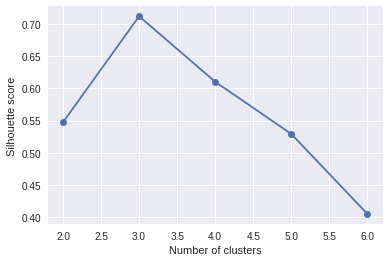

In [62]:
plt.plot(range(2,7),sil_score,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score');

### Blobs example

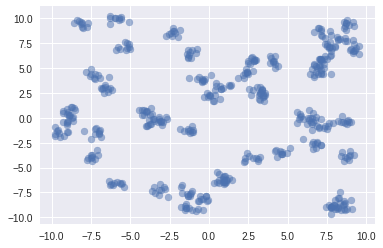

In [63]:
points, l = make_blobs(500,centers=50,cluster_std=0.3)

plt.scatter(points[:,0],points[:,1],alpha=0.5)
plt.show()

In [64]:
inertias = []
sil_score = []
for it in range(10,100):
    model = KMeans(n_clusters=it,n_jobs=-1)
    labels = model.fit_predict(points)
    inertias.append(model.inertia_)
    sil_score.append(silhouette_score(points,labels))

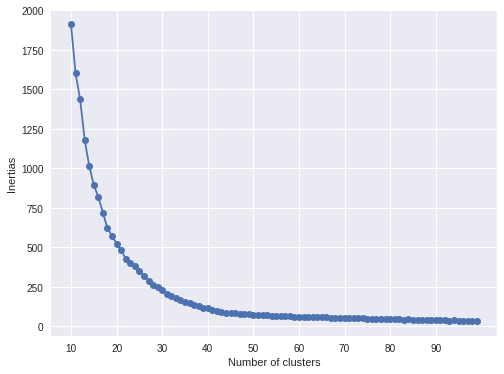

In [65]:
plt.figure(figsize=(8,6))
plt.plot(range(10,100),inertias,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias');
plt.xticks(np.arange(10,100,10));

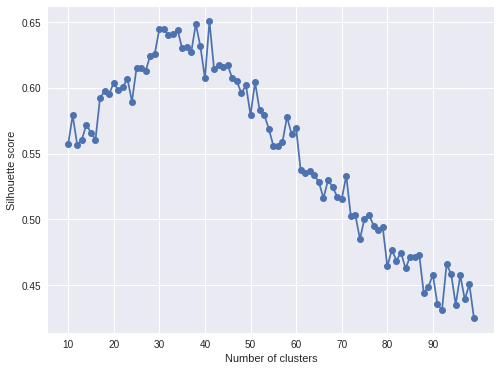

In [66]:
plt.figure(figsize=(8,6))
plt.plot(range(10,100),sil_score,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score');
plt.xticks(np.arange(10,100,10));

### Fish example

In [67]:
X.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1


In [68]:
inertias = []
sil_score = []

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for it in range(2,15):
    knn = KMeans(n_clusters=it,n_jobs=-1)
    labels = knn.fit_predict(X_scaled)
    
    inertias.append(knn.inertia_)
    sil_score.append(silhouette_score(X_scaled,labels))

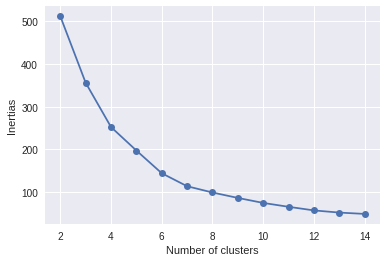

In [69]:
plt.plot(range(2,15),inertias,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias');

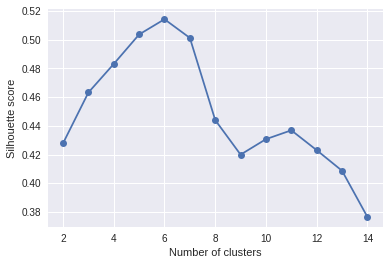

In [70]:
plt.plot(range(2,15),sil_score,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score');

### Exercise - data transformation

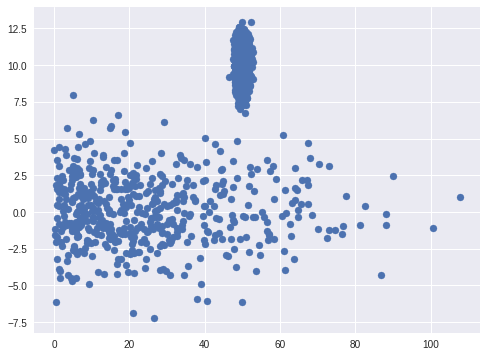

In [71]:
x1 = rnd.multivariate_normal((0,0),[[1000,0],[0,5]],1000)
x1 = x1[x1[:,0]>0,:]

x2 = rnd.multivariate_normal((50,10),[[1,0],[0,1]],1000)

x = np.vstack([x1,x2])

plt.figure(figsize=(8,6))
plt.scatter(x[:,0],x[:,1])
plt.show()

In [72]:
model = KMeans(2)
labels = model.fit_predict(x)

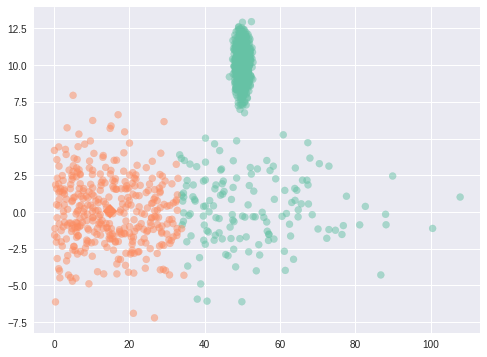

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0],x[:,1],c=colors[labels],alpha=0.5)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c=colors,marker='D',s=100);

In [74]:
pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('knn',KMeans(2))
])
labels_scaled = pipe.fit_predict(x)

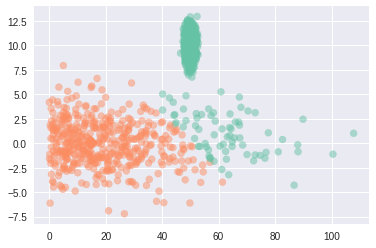

In [77]:
plt.scatter(x[:,0],x[:,1],c=colors[labels_scaled],alpha=0.5)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c=colors,marker='D',s=100);

In [79]:
x_scaled = x.copy()# przemnożenie osi
x_scaled[:,1]*=10

In [80]:
model = KMeans(2)
labels_scaled2 = model.fit_predict(x_scaled)

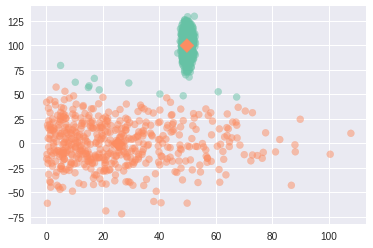

In [81]:
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=colors[labels_scaled2],alpha=0.5)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c=colors[labels_scaled2],marker='D',s=100);

In [82]:
x_scaled_log = x.copy()
x_scaled_log[:,0] = np.log(x_scaled_log[:,0]+10)

In [83]:
model = KMeans(2)
labels_scaled_log = model.fit_predict(x_scaled_log)

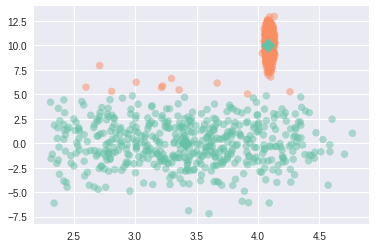

In [84]:
plt.scatter(x_scaled_log[:,0],x_scaled_log[:,1],c=colors[labels_scaled_log],alpha=0.5)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c=colors[labels_scaled_log],marker='D',s=100);

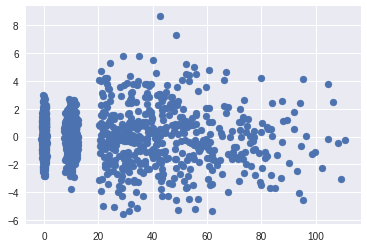

In [85]:
x1 = rnd.multivariate_normal((20,0),[[1000,0],[0,5]],1000)
x1 = x1[x1[:,0]>20,:]


x2 = rnd.multivariate_normal((0,0),[[0.1,0],[0,1]],1000)

x3 = rnd.multivariate_normal((10,0),[[1,0],[0,1]],1000)

x = np.vstack([x1,x2,x3])
plt.scatter(x[:,0],x[:,1])
plt.show()

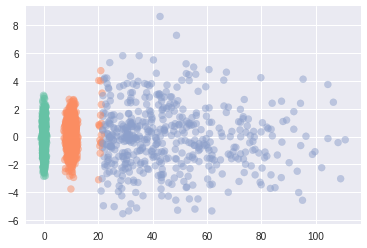

In [86]:
x_scaled_log = x.copy()
x_scaled_log[:,0] = 4*np.log(x_scaled_log[:,0]+2)

model = KMeans(3)
labels_scaled_log = model.fit_predict(x_scaled_log)

plt.scatter(x[:,0],x[:,1],c=colors[labels_scaled_log],alpha=0.5);